In [2]:
import numpy as np
import pandas as pd

from my_framework.modeles.SIRModel import SIRModel
from my_framework.modeles.SEIRModel import SEIRModel
from my_framework.etl import *
from my_framework.plot import *
import warnings
warnings.filterwarnings(action='once')
from IPython.display import display

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time


# Comparaison

In [7]:
list_country = ["France","Japan", "Brazil", "Egypt", "US" , "Norway"]
df_meta_data = get_comparaison_dataset(list_country)
dict_df_action = get_dict_df_action(list_country)
df_meta_data

,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
France,0.891,118.946,0.938083,65129.731,42
Japan,0.915,347.987,0.954403,126860.299,48
Brazil,0.761,25.251,0.966611,211049.519,33
Egypt,0.700,100.847,1.021285,100388.076,25
US,0.920,35.974,0.979473,329064.917,38
Norway,0.954,14.726,1.020573,5378.859,40


In [8]:
def global_to_journaly(iterable):
    real = np.zeros(len(iterable))
    real[0] = iterable[0]
    for i in range(1, len(iterable)):
        real[i] = max(0, iterable[i] - iterable[i-1])
        #real[i] = iterable[i] - iterable[i-1]
    return real

In [11]:
df_death_map = clean_useless_columns_and_reset_idx(get_death_df())
country, death = df_death_map.index.tolist(), list(df_death_map[["6/17/20"]].values.reshape((-1)))
plot_map(country, death)

Country : France


/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



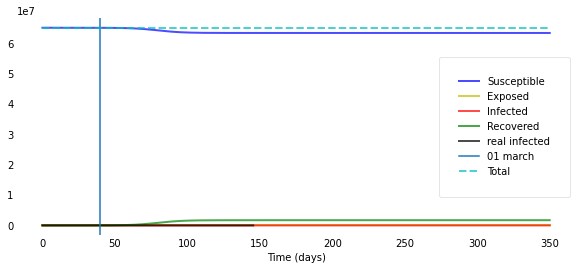

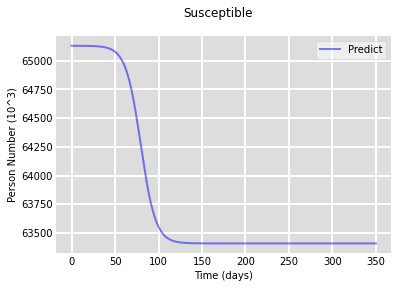

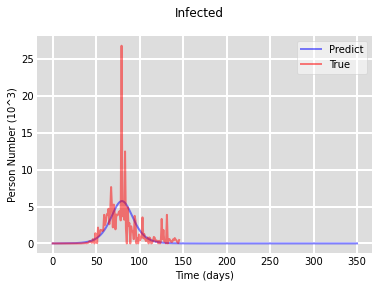

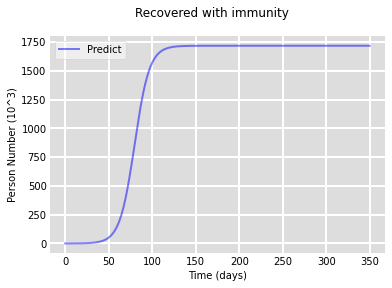

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
392,"public announcement, public transport limited",France,"Mar 15, 2020",NaN,36747.0
324,general nonessential business suspension,France,"Mar 15, 2020","Apr 15, 2020",36747.0
391,"blanket isolation - no symptoms, compulsory is...",France,"Mar 17, 2020","Mar 31, 2020",36747.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
France,0.891,118.946,0.938083,65129.731,42


taux infection max: 9e-05
--------------
Country : Japan


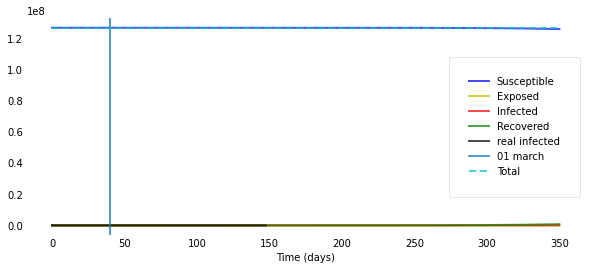

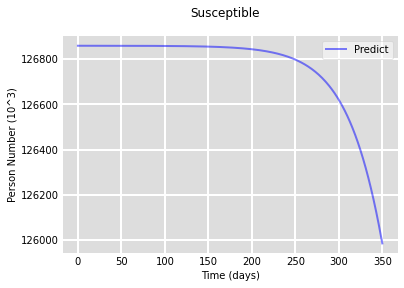

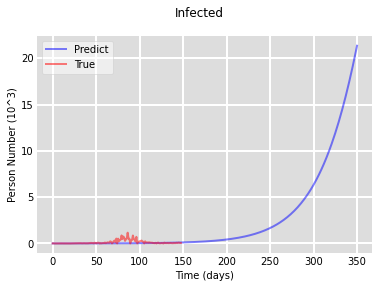

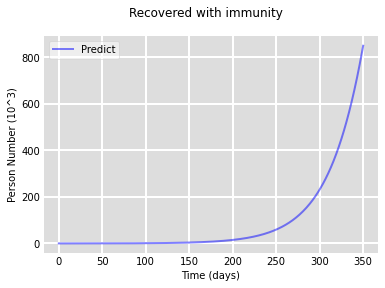

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
267,international travel ban - risk countries,Japan,"Feb 01, 2020",NaN,17305.0
1262,international travel ban - risk countries,Japan,"Feb 12, 2020",NaN,17305.0
1332,"cohort isolation - no symptoms, test contacts,...",Japan,"Feb 05, 2020","Feb 19, 2020",17305.0
1333,cohort isolation - no symptoms,Japan,"Feb 07, 2020",NaN,17305.0
1336,"clinic specialisation, handwashing encourageme...",Japan,"Mar 28, 2020",NaN,17305.0
1455,"coronavirus education activities, public mask ...",Japan,"Feb 28, 2020",NaN,17305.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
Japan,0.915,347.987,0.954403,126860.299,48


taux infection max: 0.00017
--------------
Country : Brazil


/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



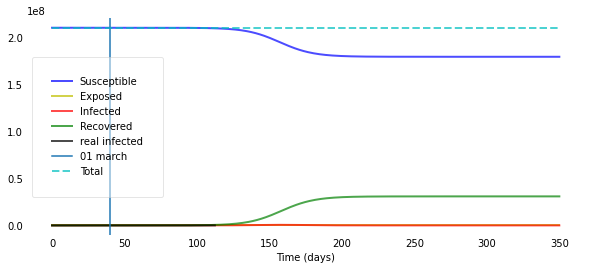

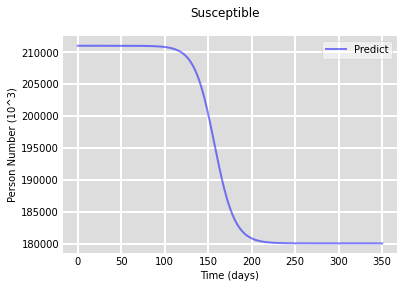

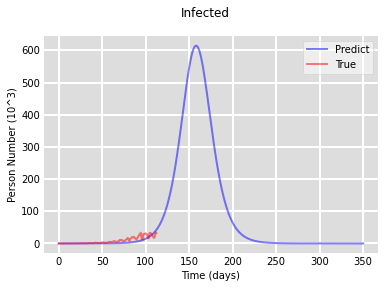

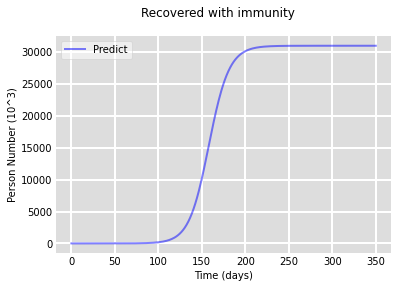

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
1612,"domestic travel limitation, limited nonessenti...",Brazil,"Mar 19, 2020",NaN,2927.0
1615,limited nonessential business suspension,Brazil,"Mar 21, 2020",NaN,2927.0
1610,international travel ban - risk countries,Brazil,"Mar 17, 2020",NaN,2927.0
1614,international travel ban - all countries,Brazil,"Mar 21, 2020",NaN,2927.0
1604,international traveller quarantine - all count...,Brazil,"Mar 13, 2020",NaN,2927.0
1597,public mask wearing data,Brazil,"Mar 10, 2020",NaN,2927.0
1598,public mask wearing data,Brazil,"Mar 03, 2020",NaN,2927.0
1599,public mask wearing data,Brazil,"Mar 24, 2020",NaN,2927.0
1600,public mask wearing data,Brazil,"Mar 17, 2020",NaN,2927.0
1601,public mask wearing data,Brazil,"Mar 31, 2020",NaN,2927.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
Brazil,0.761,25.251,0.966611,211049.519,33


taux infection max: 0.00291
--------------
Country : Egypt


/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



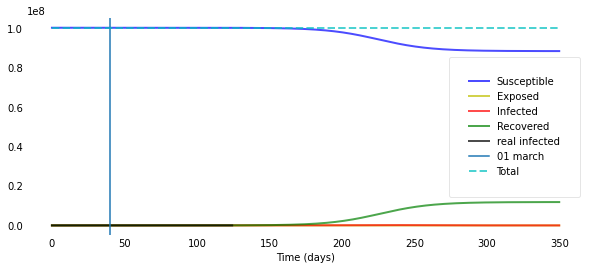

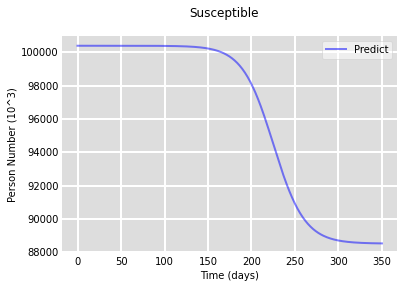

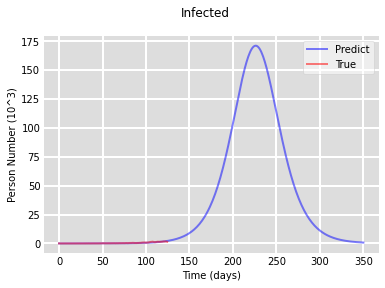

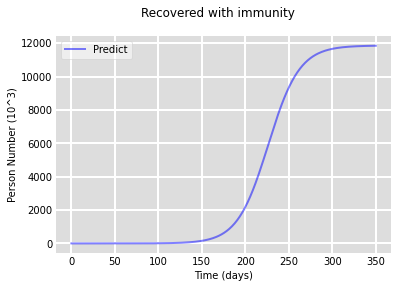

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
880,international travel ban - risk countries,Egypt,"Jan 26, 2020",NaN,0.0
881,"international travel ban - all countries, outb...",Egypt,"Mar 19, 2020",NaN,0.0
889,international travel ban - risk countries,Egypt,"Mar 13, 2020",NaN,0.0
891,"domestic travel ban, public facility cleaning",Egypt,"Mar 19, 2020",NaN,0.0
882,cohort isolation - no symptoms,Egypt,"Mar 13, 2020",NaN,0.0
883,international traveller quarantine - risk coun...,Egypt,"Mar 20, 2020",NaN,0.0
883,international traveller quarantine - risk coun...,Egypt,"Mar 20, 2020",NaN,0.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
Egypt,0.700,100.847,1.021285,100388.076,25


taux infection max: 0.00171
--------------
Country : US


/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



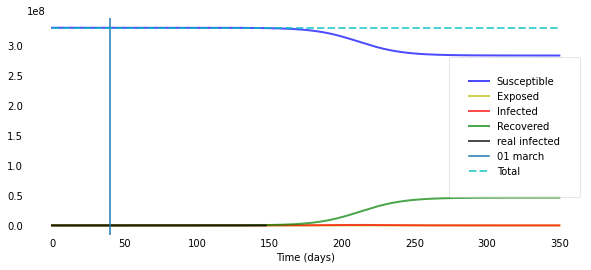

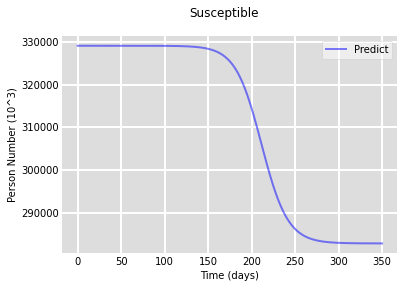

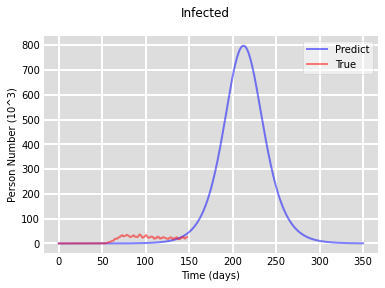

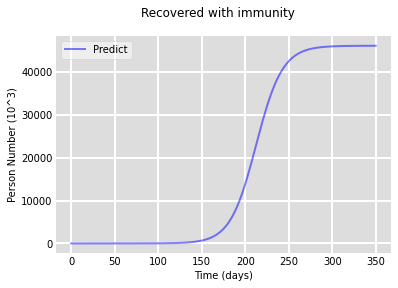

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
505,blanket isolation - no symptoms,US,"Mar 16, 2020","Apr 06, 2020",141591.0
277,quarantine planned,US,"Feb 06, 2020",NaN,141591.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
US,0.920,35.974,0.979473,329064.917,38


taux infection max: 0.00243
--------------
Country : Norway


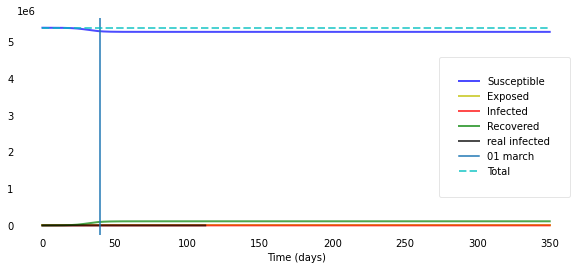

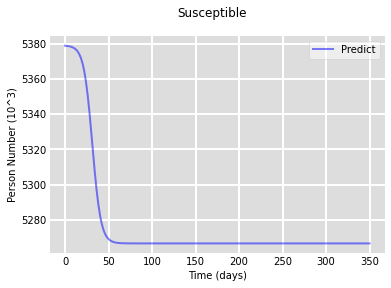

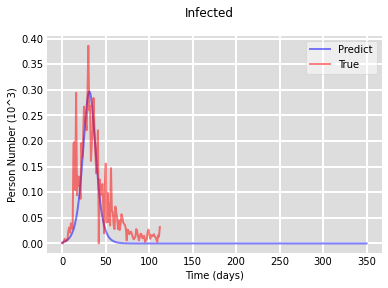

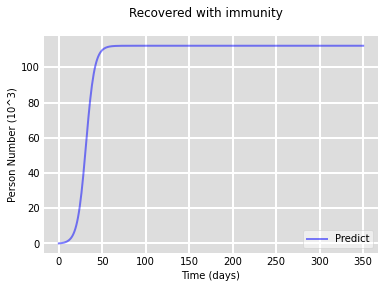

21/01/2020


,Keywords,Country,Date Start,Date end intended,nombre test total
526,"closure nonessential stores, limited nonessent...",Norway,"Mar 12, 2020","Mar 26, 2020",43735.0
528,international travel ban - all countries,Norway,"Mar 16, 2020",NaN,43735.0
536,international travel ban - all countries,Norway,"Mar 13, 2020",NaN,43735.0


,IDH,PopDensity,pourcentage_homme,PopTotal,Med. Age
Norway,0.954,14.726,1.020573,5378.859,40


taux infection max: 6e-05
--------------


In [10]:
for country in list_country:
    df_data, pop_size = get_dataset(country)
    
    print("Country : {}".format( country))
    
    # Modele
    nb_day = 350
    t = np.linspace(0, nb_day, nb_day)

    seir_model = SEIRModel()
    seir_model.fit(pop_size, global_to_journaly(df_data["confirm"]))

    S, E, I, R = seir_model.predict(t, pop_size, 1)
    plotseird(t, S, E, I, R, day_bar=40, real_I=global_to_journaly(df_data["confirm"]))
    
    plot_triple_sir(t, S, I, R, list_true_I=global_to_journaly(df_data["confirm"]))
    
    print("21/01/2020")
    display(dict_df_action[country])
    display(df_meta_data.loc[df_meta_data.index == country])
    print("taux infection max:", round((I.max() / pop_size), 5))
    print("--------------")